# Do the following tasks on the attached file containing raw tweets

Find the number of unique words in the file
Find the top 10 most frequent tokens in the file.
Remove empty rows and duplicates
Remove non-alphanumeric characters
Remove stop words
Perform a Part of speech tagging
Create a word cloud of the cleaned data



In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

the dataset was a sample of some of the tweets over the past years and this was to try and clean it and also use nltk and word cloud to determine some of the major topics

In [3]:
df=pd.read_csv("Tweets.csv")
df.head(10)

,Date,tweet
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...
5,;2017-11-19 17:13;2;5;,Luos donâ€™t kill ... blood thirsty killers ar...
6,;2017-10-14 17:23;0;0;,Same police that kill luos in bondo and shot g...
7,;2017-10-14 16:34;0;0;,But there's provision for police to kill innoc...
8,;2017-10-13 21:51;0;4;,The gvnt us determined to kill all luos youn...
9,;2017-09-01 09:28;0;0;,Today events:SCOK & Maraga being an Adventist ...


**Removing Punctuation**

In [2]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['tweet_wo_punct']=df['tweet'].apply(lambda x: remove_punctuation(x))
df.head()

,Date,tweet,tweet_wo_punct
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...,ComedyCentralKE These words can kill a Luhya W...
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...,The little luhya that remains in me always ...
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...,cheernatwildcat kill it at battle this weekend...
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...,HomeboyzRadio HBR luv dat luhya hit luhyas alw...
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...,HangOutFriday hahaha ball ya terby derby Luhy...


## 4.Removing non-alpha numeric characters

In [3]:
df.tweet_wo_punct.str.replace('[^a-zA-Z0-9]', '')

NameError: name 'df' is not defined

## Tokenizing

In [7]:
import re

def tokenize(txt):
  tokens= re.split('\W+',txt)
  return tokens
df['tweet_wo_punct_tokenized'] = df['tweet_wo_punct'].apply(lambda x:tokenize(x.lower()))
df.head(10)

,Date,tweet,tweet_wo_punct,tweet_wo_punct_tokenized
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...,ComedyCentralKE These words can kill a Luhya W...,"[comedycentralke, these, words, can, kill, a, ..."
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...,The little luhya that remains in me always ...,"[the, little, luhya, that, remains, in, me, al..."
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...,cheernatwildcat kill it at battle this weekend...,"[cheernatwildcat, kill, it, at, battle, this, ..."
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...,HomeboyzRadio HBR luv dat luhya hit luhyas alw...,"[homeboyzradio, hbr, luv, dat, luhya, hit, luh..."
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...,HangOutFriday hahaha ball ya terby derby Luhy...,"[hangoutfriday, hahaha, ball, ya, terby, derby..."
5,;2017-11-19 17:13;2;5;,Luos donâ€™t kill ... blood thirsty killers ar...,Luos donâ€™t kill blood thirsty killers are t...,"[luos, donâ, t, kill, blood, thirsty, killers,..."
6,;2017-10-14 17:23;0;0;,Same police that kill luos in bondo and shot g...,Same police that kill luos in bondo and shot g...,"[same, police, that, kill, luos, in, bondo, an..."
7,;2017-10-14 16:34;0;0;,But there's provision for police to kill innoc...,But theres provision for police to kill innoce...,"[but, theres, provision, for, police, to, kill..."
8,;2017-10-13 21:51;0;4;,The gvnt us determined to kill all luos youn...,The gvnt us determined to kill all luos youn...,"[the, gvnt, us, determined, to, kill, all, luo..."
9,;2017-09-01 09:28;0;0;,Today events:SCOK & Maraga being an Adventist ...,Today eventsSCOK Maraga being an Adventist to...,"[today, eventsscok, maraga, being, an, adventi..."


In [8]:
df1=df.copy()

## 1.  Finding  and counting the unique values



In [6]:
from collections import Counter
results=Counter()
df1['tweet_wo_punct']=df1['tweet_wo_punct'].str.lower().str.split().apply(results.update)
print(results)

NameError: name 'df1' is not defined

In [10]:
print(len(results))

31704


## 2.Find the top 10 most frequent tokens in the file.


In [11]:
df2=pd.DataFrame(results.most_common(10),columns={'words','count'})
df2

,count,words
0,are,5631
1,the,5071
2,to,3274
3,is,2851
4,you,2588
5,a,2434
6,and,2204
7,i,2024
8,of,2020
9,in,2007


## 3. Remove Empty Rows and Duplicates

In [12]:
df.isna().sum()

Date                        0
tweet                       0
tweet_wo_punct              0
tweet_wo_punct_tokenized    0
dtype: int64

no null or empty rows found

next we drop any duplicates

In [13]:
def remove_duplicates(duplist):
  noduplist=[]
  for element in duplist:
    if element not in noduplist:
      noduplist.append(element)

remove_duplicates([df['tweet_wo_punct_tokenized']])


In [14]:
df

,Date,tweet,tweet_wo_punct,tweet_wo_punct_tokenized
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...,ComedyCentralKE These words can kill a Luhya W...,"[comedycentralke, these, words, can, kill, a, ..."
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...,The little luhya that remains in me always ...,"[the, little, luhya, that, remains, in, me, al..."
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...,cheernatwildcat kill it at battle this weekend...,"[cheernatwildcat, kill, it, at, battle, this, ..."
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...,HomeboyzRadio HBR luv dat luhya hit luhyas alw...,"[homeboyzradio, hbr, luv, dat, luhya, hit, luh..."
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...,HangOutFriday hahaha ball ya terby derby Luhy...,"[hangoutfriday, hahaha, ball, ya, terby, derby..."
...,...,...,...,...
20015,;2012-04-17 17:20;0;0;,@symokuraya lol Yah the prices are exorbitant...,symokuraya lol Yah the prices are exorbitant ...,"[symokuraya, lol, yah, the, prices, are, exorb..."
20016,;2014-02-11 06:37;0;1;,@jalangomwenyewe hao wakisii wafunguliwe radio...,jalangomwenyewe hao wakisii wafunguliwe radio ...,"[jalangomwenyewe, hao, wakisii, wafunguliwe, r..."
20017,;2017-11-02 14:34;0;0;,Stop harbouring hatred we so hate one another...,Stop harbouring hatred we so hate one another...,"[stop, harbouring, hatred, we, so, hate, one, ..."
20018,;2017-10-27 06:51;0;0;,you seem to hate kikuyus n you nickname yourse...,you seem to hate kikuyus n you nickname yourse...,"[you, seem, to, hate, kikuyus, n, you, nicknam..."


## 5. Removing Stop Words

In [15]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

and next we remove them

In [16]:
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

df['tweet_wo_punct_tokenized_no_sw'] =df['tweet_wo_punct_tokenized'].apply(lambda x: remove_stopwords(x))
df.head() 

,Date,tweet,tweet_wo_punct,tweet_wo_punct_tokenized,tweet_wo_punct_tokenized_no_sw
0,;2015-08-03 15:35;0;0;,@ComedyCentralKE These words can kill a Luhya ...,ComedyCentralKE These words can kill a Luhya W...,"[comedycentralke, these, words, can, kill, a, ...","[comedycentralke, words, kill, luhya, wacha, u..."
1,;2014-07-11 23:29;0;0;,The little luhya that remains in me always ...,The little luhya that remains in me always ...,"[the, little, luhya, that, remains, in, me, al...","[little, luhya, remains, always, sitokingi, ki..."
2,;2014-02-07 18:36;0;2;,@cheernatwildcat kill it at battle this weeken...,cheernatwildcat kill it at battle this weekend...,"[cheernatwildcat, kill, it, at, battle, this, ...","[cheernatwildcat, kill, battle, weekend, wildc..."
3,;2011-10-09 19:34;0;0;,@HomeboyzRadio H.B.R luv dat luhya hit luhyas ...,HomeboyzRadio HBR luv dat luhya hit luhyas alw...,"[homeboyzradio, hbr, luv, dat, luhya, hit, luh...","[homeboyzradio, hbr, luv, dat, luhya, hit, luh..."
4,;2015-08-21 09:27;2;3;,#HangOutFriday hahaha ball ya terby( derby) L...,HangOutFriday hahaha ball ya terby derby Luhy...,"[hangoutfriday, hahaha, ball, ya, terby, derby...","[hangoutfriday, hahaha, ball, ya, terby, derby..."


## 6. Part of Speech Tagging

In [17]:
df['tweet_wo_punct_tokenized_no_sw']=df['tweet_wo_punct_tokenized_no_sw'].astype('string')

In [18]:
df.dtypes

Date                              object
tweet                             object
tweet_wo_punct                    object
tweet_wo_punct_tokenized          object
tweet_wo_punct_tokenized_no_sw    string
dtype: object

In [19]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
list1= df['tweet_wo_punct_tokenized_no_sw'].tolist()
string1="".join(list1)
tokens = nltk.sent_tokenize(string1)
print("Parts of Speech",nltk.pos_tag(tokens))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Parts of Speech [("['comedycentralke', 'words', 'kill', 'luhya', 'wacha', 'ugali', 'ipoe']['little', 'luhya', 'remains', 'always', 'sitokingi', 'kills']['cheernatwildcat', 'kill', 'battle', 'weekend', 'wildcat', 'luhya']['homeboyzradio', 'hbr', 'luv', 'dat', 'luhya', 'hit', 'luhyas', 'always', 'kill', 'awoooh']['hangoutfriday', 'hahaha', 'ball', 'ya', 'terby', 'derby', 'luhyas', 'kill']['luos', 'donâ', 'kill', 'blood', 'thirsty', 'killers', 'two', 'tribes']['police', 'kill', 'luos', 'bondo', 'shot', 'grannies', 'migori']['theres', 'provision', 'police', 'kill', 'innocent', 'unarmed', 'luos', '']['gvnt', 'us', 'determined', 'kill', 'luos', 'young', 'old', 'issfine']['today', 'eventsscok', 'mar

##6. Text Visualization Using Word Cloud

converting column into list first

In [20]:
list1= df['tweet_wo_punct_tokenized_no_sw'].tolist()

converting list to string

In [21]:
string1="".join(list1)


feed string to word cloud generator

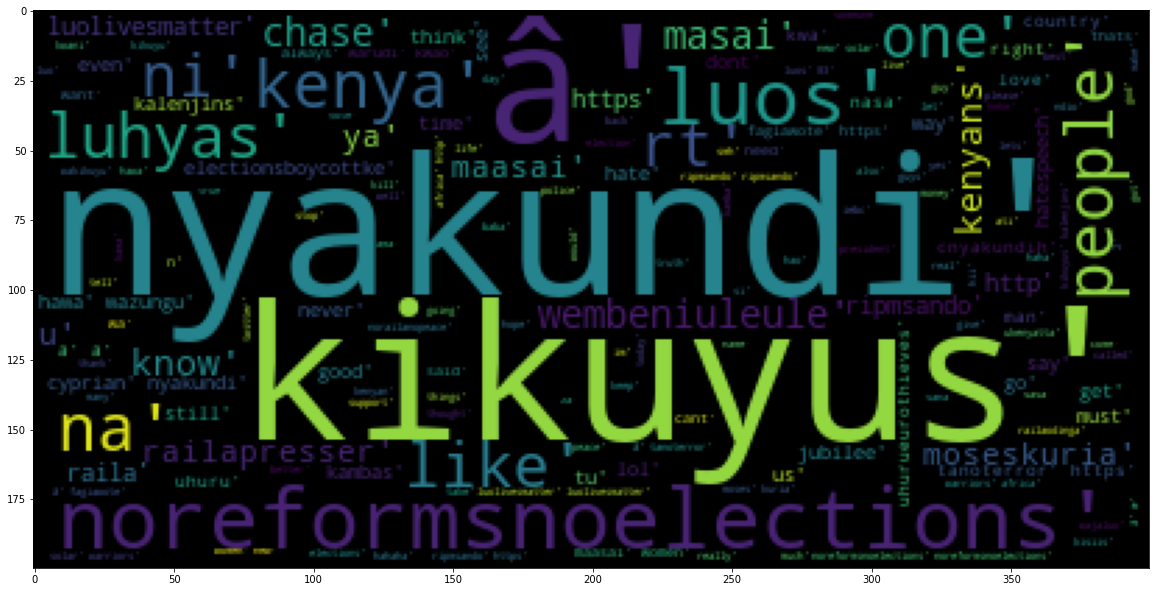

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))

the largest words are kikuyu's, nyakundi, no elections, luos, moses kuria which were the most popular